In [22]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.size'] = 24
#mpl.rc('xtick', labelsize=20) 
#mpl.rc('ytick', labelsize=20) 

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [23]:
hads_2017 = pd.read_csv('hads_2017.csv')
hads_2017.head(3)

,Unnamed: 0,CLSC1,CLFC1,EPRC1,CLRC1,CSAC1,EPRC1_cumsum
0,2016-10-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-10-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-10-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
hads_2019 = pd.read_csv('hads_2019.csv')
hads_2019.head(3)

,datetime,CLSC1,CLFC1,EPRC1,CLRC1,CSAC1,EPRC1_cumsum
0,2018-10-01 00:00:00+00:00,0.0,0.0,0.0,0,0.0,NaN
1,2018-10-01 01:00:00+00:00,0.0,0.0,0.0,0,0.0,0.0
2,2018-10-01 02:00:00+00:00,0.0,0.0,0.0,0,0.0,0.0


In [25]:
hads_2017['Unnamed: 0'] =  pd.to_datetime(hads_2017['Unnamed: 0'])
hads_2017.dtypes

Unnamed: 0      datetime64[ns, UTC]
CLSC1                       float64
CLFC1                       float64
EPRC1                       float64
CLRC1                       float64
CSAC1                       float64
EPRC1_cumsum                float64
dtype: object

In [26]:
hads_2017 = hads_2017.set_index('Unnamed: 0')

In [27]:
hads_2019['datetime'] =  pd.to_datetime(hads_2019['datetime'])
hads_2019.dtypes

datetime        datetime64[ns, UTC]
CLSC1                       float64
CLFC1                       float64
EPRC1                       float64
CLRC1                         int64
CSAC1                       float64
EPRC1_cumsum                float64
dtype: object

In [28]:
hads_2019 = hads_2019.set_index('datetime')

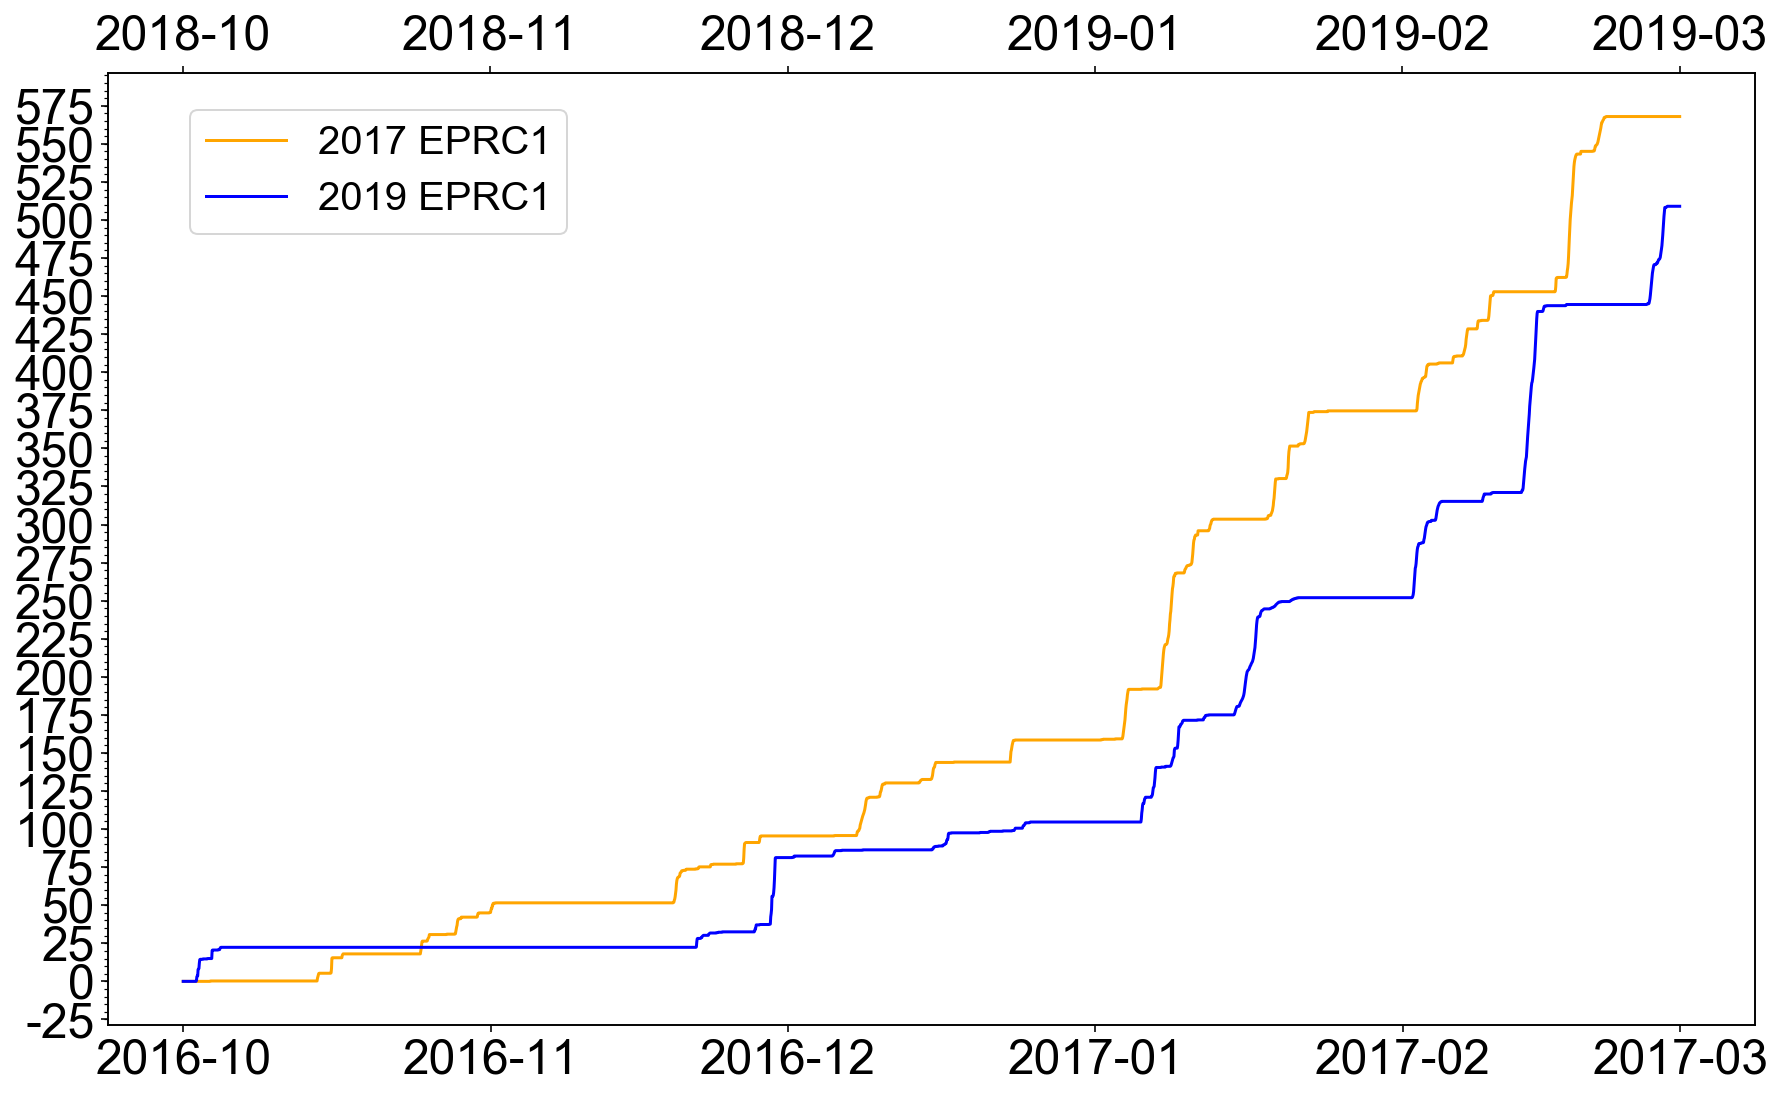

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twiny()

#2017 data
ax.plot(hads_2017.loc['2016-10-01 00:00:00':'2017-02-28 23:45:00', 'EPRC1_cumsum'], color='orange', label = '2017 EPRC1')

#2019 data
ax2.plot(hads_2019.loc['2018-10-01 00:00:00':'2019-02-28 23:45:00', 'EPRC1_cumsum'], color='blue', label = '2019 EPRC1')

ax.yaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(5))

fig.legend(bbox_to_anchor=(0.08, 0.8), loc='upper left', fontsize=20)

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#fig.savefig('figures/event_comparison.pdf', bbox_inches='tight')